In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../' # Expected to be in rank_scripts/

import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os

In [11]:
caffe.set_device(0)
caffe.set_mode_gpu()
net = caffe.Net(caffe_root +  'rank_scripts/multi/deploy_multinet2.prototxt',
                caffe_root + 'rank_scripts/models100/_iter_802.caffemodel',
                caffe.TEST)# input preprocessing: 'data'is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

In [12]:
# set net to batch size
net.blobs['data'].reshape(50,3,256,128)

[-29102.44140625  22533.2890625  -25473.16015625 ..., -34278.14453125
  21697.21484375  46081.2734375 ]


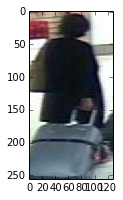

In [13]:
#query_image_path = '/home/jayant/caffe-Person-ReID_triplet/rank_scripts/images_market/0004_c1s6_016996_00.jpg'
query_image_path = '/home/jayant/vision/PETA/i-LID_resize/archive/0001_001.jpg'
query_image = caffe.io.load_image(query_image_path)
net.blobs['data'].data[...] = transformer.preprocess('data', query_image)
out = net.forward()
vector_query = out['fc7'][0]
plt.figure(figsize=(3,3))
plt.imshow(query_image)
print vector_query

In [6]:
print net.blobs['data'].data[...][0][2][255][127]

181.0


In [8]:
print query_image[255][127][0]*255

181.000004411


In [10]:
print net.blobs['conv3'].data[...][0]

[[[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  ..., 
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]]

 [[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00   4.26511574e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00   1.60778637e+01]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
  

In [18]:
print net.blobs['conv3'].data[...][0]

[[[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  ..., 
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00  -0.00000000e+00]]

 [[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00   2.83279490e+00]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00   1.30197058e+01]
  [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
  

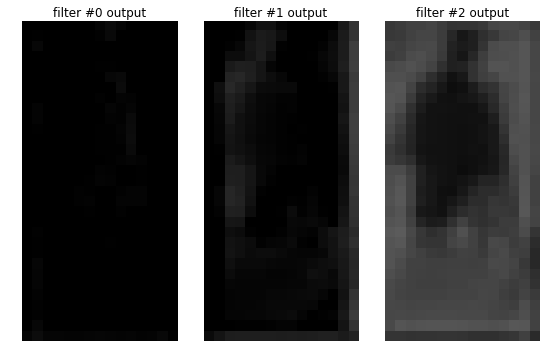

In [68]:
# helper show filter outputs
def show_filters(net):
    net.forward()
    plt.figure()
    filt_min, filt_max = net.blobs['conv2'].data.min(), net.blobs['conv2'].data.max()
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv2'].data[0, i], vmin=filt_min, vmax=filt_max)
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(net)

In [21]:
print out['fc8_a'][0]

[-5.07031441 -1.53743374 -3.13067937 -1.50872409 -2.50578737 -5.07027006
  0.5862155   0.09506826 -1.57538342 -3.03098321 -2.47495723 -5.07032537
 -3.80887437 -5.0702157  -5.07017279  0.39664015 -3.63829494 -3.41963029
 -5.0702033  -5.07023764 -5.0702281  -5.07020664 -3.49217391 -3.72313142
 -5.07026958 -1.48995793 -3.90329933 -5.07020044 -1.71060789 -5.07026339
 -5.07029057  1.96362329 -1.41495848 -5.07031488 -3.35570836 -4.34189939
 -5.07040453 -1.61757398 -4.60614204 -1.67165339 -5.07046032 -4.47011995
 -3.9013567   0.36309284 -2.41938257 -5.07035065 -2.97982478 -5.07036591
 -4.60750198 -5.07031965 -3.80918503 -1.09831262  0.05781385  2.41927171
 -5.07025766 -2.93700457 -3.0803647  -1.20564604  2.50400782 -2.77584124
 -5.07037544 -4.00281858 -2.06335711  1.04557168 -2.93833828 -5.07024622
 -4.0013566  -1.91946113 -1.83014929 -5.07026052 -1.98111951 -5.07029724
 -1.51585269 -3.02928233 -4.00154877 -3.49175024 -0.28959811 -1.35231304
 -1.21089673 -0.19017984  2.26276183 -5.07026339 -1